# Student Name: Martin Power
# Student ID: 9939245

## Probability Experiment

This experiment is two draw a pair of cards from a deck of 52 cards and determine what is the expected value of the pair.

From the experiment, I plan to get the probabilities of drawing all of the allowed values (e.g. 21/Blackjack) and use this to determine what value on average can be expected when a pair of cards is taken from a shuffled deck of 52 cards

In [112]:
%reset -f
import numpy as np
import random as rand
import matplotlib.pyplot as plt


In [113]:
# Class used to encapsulate a playing card for Experiment
class Card():
    
    
    def __init__(self, name = 'Ace', suit = 'Diamonds'):
        """Initialize a playing card.
           Name  = Type of Card (e.g. Ace, 2, King, etc)
           Suit  = Hearts, Clubs, Spades or Diamons
           Value = Numerical value assigned based on Card Type
        """
        self.name = name
        self.suit = suit
        if(self.name=='Ace'):
            self.value = 1      # Ignoring ACE=10 for now
            self.face  = 0
        elif((self.name=='Jack') or (self.name=='Queen') or (self.name=='King')):
            self.value = 10
            self.face  = 1
        else:
            self.value = int(self.name)
            self.face  = 0
    
    def display_info(self):
        """ Print Card Name and Suit
        """
        print(self.name, self.suit)
    
    def get_pair_value(self, other):
        """Calculate the value of two cards.
           Handle situations where one card is an Ace per rules of Blackjack
        """
        if((self.name=='Ace') and (other.name=='Ace')):
            pair_value = 11
        elif(((self.name=='Ace') and (other.face==1)) or ((other.name=='Ace') and (self.face==1))):
            pair_value = 21
        else:
            pair_value = self.value + other.value
            
        return pair_value
    
    def get_suit_idx(self):
        """ Convert Suit to a Numerical Value for Use as an Index
        """
        if(self.suit=='Clubs'):
            suit_idx = 0
        elif(self.suit=='Spades'):
            suit_idx = 1
        elif(self.suit=='Diamonds'):
            suit_idx = 2
        else:
            suit_idx = 3
        return suit_idx
    
    def get_name_idx(self):
        """ Convert Card Name to a Numerical Value for Use as an Index
        """
        if(self.name=='Ace'):
            name_idx = 0
        elif(self.name=='Jack'):
            name_idx = 10
        elif(self.name=='Queen'):
            name_idx = 11
        elif(self.name=='King'):
            name_idx = 12
        else:
            name_idx = int(self.name) - 1
        return name_idx

        
        

In [114]:
### Runnig Experiment ###
suits = ['Clubs', 'Spades', 'Diamonds', 'Hearts']
names = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']

# Create deck
deck = [Card(name, suit) for name in names for suit in suits]
# Two cards for use in the experiment
card1 = Card()
card2 = Card()

# Control Verbosity of Experiment (1 = High Verbosity)
verbose = 0
# Number of iterations to run experiment for
iterations = 100000

# Initialize empty Numpy arrays to store the frequency of the occurence of card events
suit_freq = np.zeros(len(suits))
name_freq = np.zeros(len(names))
value_freq = np.zeros(iterations)
pair_freq = np.zeros(22)

# Iterate Experiment
for i in range(0,iterations):
    # Shuffle deck
    rand.shuffle(deck)
    # Pick two cards from the shuffled deck
    card1, card2 = rand.sample(deck,2)
    if(verbose == 1):
        print("\nShuffle",i)
        card1.display_info()
        card2.display_info()
        print("Pair Value is ", card1.get_pair_value(card2))
    # Update arrray with value of pair of cards
    value_freq[i] = card1.get_pair_value(card2)    
    pair_freq[card1.get_pair_value(card2)]+=1
    # Update array with suits of cards drawn
    suit_freq[card1.get_suit_idx()]+=1
    suit_freq[card2.get_suit_idx()]+=1
    # Update array with names of cards drawn
    name_freq[card1.get_name_idx()]+=1
    name_freq[card2.get_name_idx()]+=1

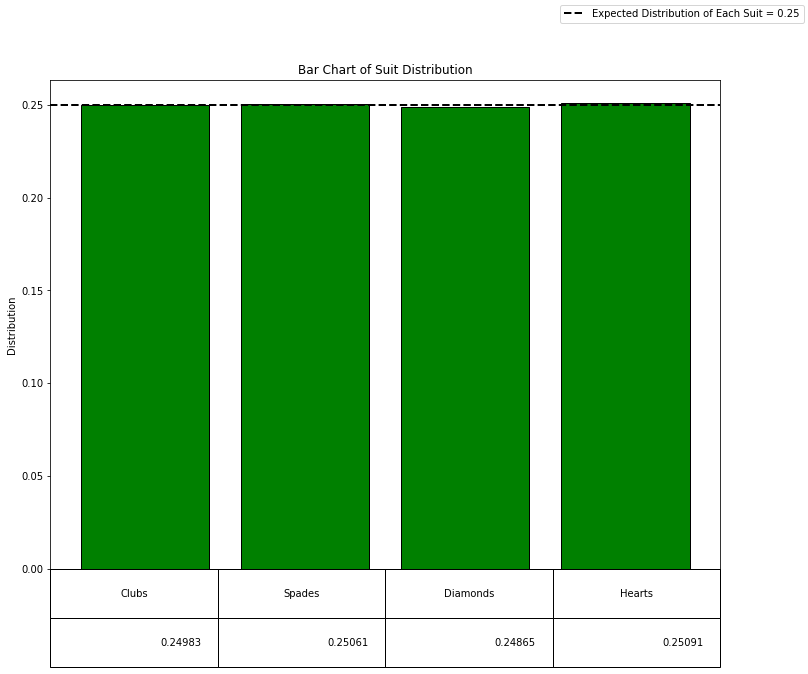


The expected distribution of each suit, with uniform distribution is 0.25 (i.e. 1/4 suits)


In [115]:
### Outputs and Graphs (1) ###

# Adjust Size of Figures
plt.rcParams["figure.figsize"] = (12,9)

## Print Distribution of the Suits of All the Cards Drawn
## As there are 4 suits, with uniform distribution you would 
## expect each suit to be drawn 25% of the time

plt.bar([1,2,3,4],suit_freq/(2*iterations),facecolor='green', edgecolor='black')
#plt.xlabel('Suits')
plt.ylabel('Distribution')
plt.title('Bar Chart of Suit Distribution')
#plt.xticks([1,2,3,4], suits)
# From https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
# Remove ticks and labels from X-axis
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.axhline(1/len(suit_freq), color='k', linestyle='dashed', linewidth=2, label='Expected Distribution of Each Suit = 0.25')
plt.figlegend()
the_table = plt.table(cellText=(suit_freq.reshape(1,4)/(2*iterations)),colLabels=suits,loc='bottom')
# From https://stackoverflow.com/questions/9932072/matplotlib-table-formatting
# Adjust cell height
table_props = the_table.properties()
table_cells = table_props['child_artists']
for cell in table_cells: cell.set_height(0.1)
plt.show()

print("\nThe expected distribution of each suit, with uniform distribution is 0.25 (i.e. 1/4 suits)")

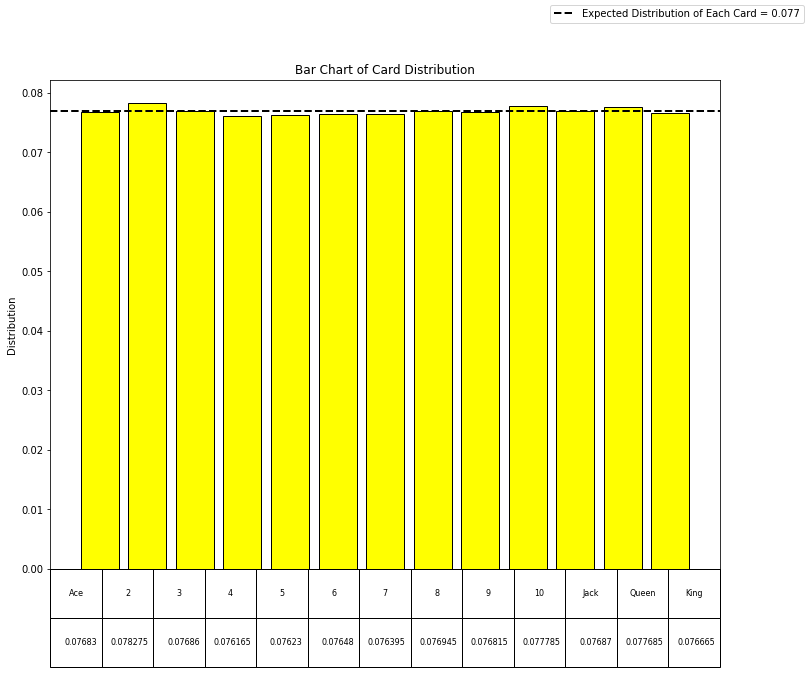


The expected distribution of each card, with uniform distribution is 0.077 (i.e. 1/13 card types)


In [116]:
### Outputs and Graphs (2) ###

## Print Distribution of the Type of All the Cards Drawn
## As there are 13 different cards in each suit, with uniform distribution
## you would expect each card to be drawn 1/13th (0.0769) of the time

plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13],name_freq/(2*iterations),facecolor='yellow', edgecolor='black')
#plt.xlabel('Cards')
plt.ylabel('Distribution')
plt.title('Bar Chart of Card Distribution')
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13], names)
# From https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
# Remove ticks and labels from X-axis
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.axhline(1/len(name_freq), color='k', linestyle='dashed', linewidth=2,label='Expected Distribution of Each Card = 0.077')
plt.figlegend()
# From https://stackoverflow.com/questions/9932072/matplotlib-table-formatting
# Adjust cell height
the_table = plt.table(cellText=(name_freq.reshape(1,13)/(2*iterations)),colLabels=names,loc='bottom')
table_props = the_table.properties()
table_cells = table_props['child_artists']
for cell in table_cells: cell.set_height(0.1)

plt.show()

print("\nThe expected distribution of each card, with uniform distribution is 0.077 (i.e. 1/13 card types)")

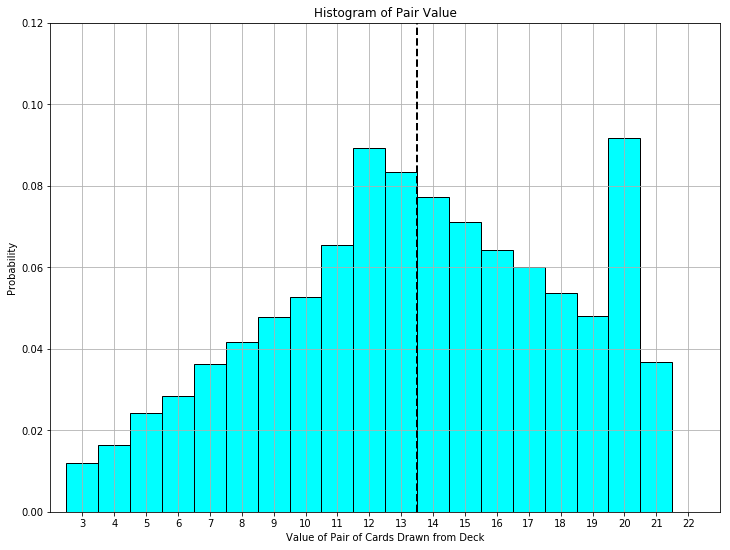


The Random Variable is the value of a pair of cards drawn at random from a deck of cards.

The pair value is calculated according to the rules of Blackjack

The expected value obtained using np.average is 13.488979999999996
The expected value obtained using mean() is 13.48898

The standard deviation is  4.578899273799327


In [117]:
### Outputs and Graphs (3) ###

## Print Histogram of the Pair Values for all Pairs of Cards Drawn
## From previous graphs, we know card values are uniformly distributed.
## This graph shows how pair values combine according to the rules of blackjack
## and accordin to the uniform distribution to give an expected value for a pair of cards

# Discrete values that pair value can take. Used for expected variable calculation
values = np.arange(3,22)

# Bins used in Histogram
value_bins = np.arange(3,23)

# Historgram
n, bins, patches = plt.hist(value_freq, value_bins, density=True, facecolor='cyan', edgecolor='black', align='left')
plt.xlabel('Value of Pair of Cards Drawn from Deck')
plt.ylabel('Probability')
plt.title('Histogram of Pair Value')
plt.axis([3, 24, 0, 0.12])
plt.grid(True)
plt.xticks(value_bins)
plt.xlim(2, 23)
plt.axvline(np.average(values,weights=n), color='k', linestyle='dashed', linewidth=2, label='Expected Value')
plt.show()

print("\nThe Random Variable is the value of a pair of cards drawn at random from a deck of cards.")
print("\nThe pair value is calculated according to the rules of Blackjack")

# Expected Value of Random Variable
# From https://nzmaths.co.nz/category/glossary/expected-value-discrete-random-variable
#     For a discrete random variable the expected value is calculated by summing the product
#     of the value of the random variable and its associated probability, taken over all of
#     the values of the random variable
# This can be calculated in numpy as follows:
expected_value = np.average(values,weights=n)
# Alteravtively, for this data, you could just get the mean of the following array
expected_value_alt = value_freq.mean()

print("\nThe expected value obtained using np.average is",expected_value)
print("The expected value obtained using mean() is",expected_value_alt)


# The standard deviation can be obtained as
std_dev = value_freq.std()
print("\nThe standard deviation is ",std_dev)



In [118]:
### Outputs and Graphs (4) ###
# What are the odds of getting Blackjack (ACE with a 10/Jack/Queen/King)

print("The probability of getting Blackjack when drawing a pair of cards from a shuffled deck is", n[-1])

print("\nNOTE : Be Gamble Aware! The House Always Wins!")

The probability of getting Blackjack when drawing a pair of cards from a shuffled deck is 0.03665

NOTE : Be Gamble Aware! The House Always Wins!
